# Fine-Grained Sneaker Classification with Robot-Captured Images: Phase 3

### Introduction

In this phase, we deploy and test our fine-grained sneaker classifier using images captured by a robot's onboard camera. The goal is to adapt our model to real-world conditions and evaluate its performance on new, unseen data.

We selected 3 classes from our original 21-class dataset and collected a new set of robot-captured images for fine-tuning and testing. After evaluating the model's performance on this data, we fine-tuned it further to improve accuracy under new imaging conditions.

Finally, we deployed the classifier to the robot and programmed it to perform specific actions based on the recognized object class.

> **Note on Contributions:**  
All work in Phase 3 — including robot image capture, dataset preparation, model training, evaluation, and documentation — was independently completed by **Shaimon Rahman**.  
A portion of the dataset used in this phase included non-robot images contributed by another student, which were merged to enhance diversity.



### Image Renaming and Dataset Preparation for Phase 3

To prepare the dataset captured using the robot's camera, we organized and renamed the images into a consistent, model-friendly format. Each subfolder in the original dataset corresponds to one of the three selected sneaker classes:

- **Nike_Infinity_React_3**  
- **Nike_Vomero_17**  
- **Nike_Winflo_10**

These classes were selected because we had physical access to these sneaker models and were able to bring them into the lab during the practical sessions. This allowed us to capture high-quality, real-world images using the robot’s camera, ensuring alignment between training and deployment conditions.

> **Note:** All images were captured using the `ros2_image_capture_from_camera.py` script running on the robot. To enhance robustness, we intentionally captured images under **varied lighting conditions** (e.g., bright, dim, and mixed environments).

The following script performs the following operations:

1. **Renames all images** within each class folder to follow the format:  
   `<class_name>_robot_<index>.jpg` — making it easy to track image origin.

2. **Splits the data** into:
   - **Fine-tuning set** (70% of the images)  
   - **Test set** (30% of the images)

3. **Creates a new directory structure** under `robot_dataset/` with:
   - `fine_tuning/`
   - `test_set/`  
   Each containing class-specific subfolders with renamed images.

This organization ensures the model can be fine-tuned and evaluated in a reproducible and scalable way using robot-collected data.

Below are example images from each of the three selected classes:

<p style="display: flex; justify-content: center; gap: 10px;">
  <img src="Phase_3/Robot_images/Nike_Infinity_React_3/Nike_Infinity_React_3_15.jpg" width="200"/>
  <img src="Phase_3/Robot_images/Nike_Vomero_17/Nike_Vomero_17_17.jpg" alt="Nike Vomero 17" width="200"/>
  <img src="Phase_3/Robot_images/Nike_Winflo_10/Nike_Winflo_10_15.jpg" alt="Nike Winflo 10" width="200"/>
</p>


In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
base_dir = "/Users/shaimonrahman/Desktop/COMP8430/Group Project/Phase_3/Robot_images"
output_dir = "/Users/shaimonrahman/Desktop/COMP8430/Group Project/Phase_3/robot_dataset"
fine_tune_dir = os.path.join(output_dir, "fine_tuning")
test_dir = os.path.join(output_dir, "test_set")

# Create output directories
os.makedirs(fine_tune_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Parameters
test_ratio = 0.3  # 30% test, 70% training

# Process each class folder
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_path):
        continue  # Skip non-folder entries

    # Get image files
    image_files = [
        f for f in os.listdir(class_path)
        if f.lower().endswith(('.jpg', '.jpeg', '.png')) and not f.startswith('.')
    ]
    image_files.sort()

    if len(image_files) < 2:
        print(f"Skipping {class_name} – not enough images.")
        continue

    # Split images into training and test sets
    train_imgs, test_imgs = train_test_split(image_files, test_size=test_ratio, random_state=42)

    # Create class subfolders
    train_out_dir = os.path.join(fine_tune_dir, class_name)
    test_out_dir = os.path.join(test_dir, class_name)
    os.makedirs(train_out_dir, exist_ok=True)
    os.makedirs(test_out_dir, exist_ok=True)

    # Rename and copy training images
    for idx, img_name in enumerate(train_imgs, start=1):
        src = os.path.join(class_path, img_name)
        dst_name = f"{class_name}_robot_{idx}.jpg"
        dst = os.path.join(train_out_dir, dst_name)
        shutil.copy2(src, dst)

    # Rename and copy test images
    for idx, img_name in enumerate(test_imgs, start=1):
        src = os.path.join(class_path, img_name)
        dst_name = f"{class_name}_robot_{idx}.jpg"
        dst = os.path.join(test_out_dir, dst_name)
        shutil.copy2(src, dst)

    print(f"Processed class: {class_name} – {len(train_imgs)} train / {len(test_imgs)} test images")

print("\nImage renaming and splitting complete.")
print(f"Fine-tuning set saved to: {fine_tune_dir}")
print(f"Test set saved to: {test_dir}")

Processed class: Nike_Vomero_17 – 23 train / 11 test images
Processed class: Nike_Winflo_10 – 26 train / 12 test images
Processed class: Nike_Infinity_React_3 – 23 train / 11 test images

Image renaming and splitting complete.
Fine-tuning set saved to: /Users/shaimonrahman/Desktop/COMP8430/Group Project/Phase_3/robot_dataset/fine_tuning
Test set saved to: /Users/shaimonrahman/Desktop/COMP8430/Group Project/Phase_3/robot_dataset/test_set


### Justification for Fine-Tuning and Test Set Split (70/30)

For Phase 3, we divided the robot-captured dataset into **70% for fine-tuning** and **30% for testing**. This split was chosen to strike a practical balance between **model adaptation** and **evaluation reliability**.

#### 1. Maximizing Model Adaptation
- Images captured by the robot differ from the original dataset in terms of **lighting**, **camera angle**, and **background clutter**.
- Fine-tuning the model on these robot-specific images helps address this **domain shift**, ensuring better performance in real deployment.
- Using 70% of the data for fine-tuning gives the model sufficient exposure to this new visual domain, helping it adjust its learned representations effectively.

#### 2. Ensuring Reliable Evaluation
- The remaining 30% of the images are kept strictly for evaluation, ensuring that the model is tested only on **previously unseen** robot images.
- This prevents data leakage and allows us to assess true generalization performance, which is critical for real-world usage.

#### 3. Practical Trade-off in Data-Constrained Settings
- In real scenarios, especially those involving robot vision or small-scale data collection, annotated images can be scarce.
- A 70/30 split is a commonly accepted compromise that provides **enough training signal** without sacrificing the validity of test results.

This approach ensures that the model is both well-adapted to the robot's data and evaluated rigorously, maintaining a balance between **robust training** and **credible performance assessment**.


### Merging and Re-Preparing the Dataset for Full Fine-Tuning (Phase 3)

For Phase 3, we merge these individual datasets to form a **complete and unified dataset** covering all 21 sneaker classes.

This step is essential for:
- Fine-tuning our selected model (**InceptionV3**) on the entire Phase 2 dataset.
- Establishing a strong base before evaluating the model on robot-captured images for the selected 3 classes.

To ensure consistency and structure, we performed the following preprocessing steps:

1. **Merge and convert all images** to `.jpg` format with standardized class-based filenames  
   (e.g., `Nike_AirMax_90.jpg`, `Nike_Vomero_17.jpg`), using a temporary directory to avoid conflicts.

2. **Split the dataset** into training, validation, and test sets using a **60/10/30 ratio**, ensuring balanced class distribution.

3. **Rebuild the folder structure** using `splitfolders`, creating `train/`, `val/`, and `test/` directories for model training and evaluation.

This finalized dataset now serves as our **Phase 2 baseline**, used for:
- Fine-tuning the model on **all 21 classes**.
- Later evaluation using **robot-captured images** for the 3 selected classes.


In [65]:
import os
import glob
from PIL import Image
import shutil
import splitfolders

def convert_and_rename_images(directory):
    """
    Convert all images in each class folder to JPEG format and rename them
    consistently using the format <class_name>_<index>.jpg.
    Uses a temporary directory to avoid naming conflicts.
    """
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        if not os.path.isdir(folder_path):
            continue

        temp_folder_path = os.path.join(folder_path, 'temp')
        os.makedirs(temp_folder_path, exist_ok=True)

        images = sorted(glob.glob(os.path.join(folder_path, '*.*')))

        for i, img_path in enumerate(images):
            if 'temp' in img_path:
                continue  # Skip the temp directory itself

            new_filename = f"{folder}_{i + 1}.jpg"
            temp_path = os.path.join(temp_folder_path, new_filename)

            try:
                with Image.open(img_path) as img:
                    img = img.convert('RGB')
                    img.save(temp_path, 'JPEG')
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

        # Delete original files
        for img_path in images:
            if 'temp' in img_path:
                continue
            os.remove(img_path)

        # Move renamed files back
        for temp_file in os.listdir(temp_folder_path):
            shutil.move(os.path.join(temp_folder_path, temp_file), folder_path)

        os.rmdir(temp_folder_path)

# === Step 1: Convert and Rename Images ===
base_dir = '/Users/shaimonrahman/Desktop/COMP8430/Group Project/Phase_3/Data'
convert_and_rename_images(base_dir)

# === Step 2: Split into Train/Val/Test (60/10/30) ===
output_folder = '/Users/shaimonrahman/Desktop/COMP8430/Group Project/Phase_3/Data_split'
splitfolders.ratio(base_dir, output=output_folder, seed=42, ratio=(0.6, 0.1, 0.3))

# === Step 3: Verify Image Counts Per Class ===
def check_images_per_category(directory):
    print(f"\nContents of: {directory}")
    categories = sorted(os.listdir(directory))
    for category in categories:
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            num_images = len([
                f for f in os.listdir(category_path)
                if f.lower().endswith(('.jpg', '.jpeg', '.png'))
            ])
            print(f"  - {category}: {num_images} images")

print("\nTraining Data:")
check_images_per_category(os.path.join(output_folder, 'train'))

print("\nValidation Data:")
check_images_per_category(os.path.join(output_folder, 'val'))

print("\nTesting Data:")
check_images_per_category(os.path.join(output_folder, 'test'))


Copying files: 1288 files [00:00, 1920.67 files/s]


Training Data:

Contents of: /Users/shaimonrahman/Desktop/COMP8430/Group Project/Phase_3/Data_split/train
  - Adidas_Adios_Pro_4: 34 images
  - Adidas_Supernova_Rise_2: 31 images
  - Adidas_Ultraboost_5: 37 images
  - Asics_GT_2000_11: 30 images
  - Asics_Gel_Kayano_31: 33 images
  - Asics_Gel_Nimbus_26: 40 images
  - Hoka_Bondi_8: 33 images
  - Hoka_Clifton_9: 51 images
  - Hoka_Rincon_4: 42 images
  - Nike_Air_Max_270: 31 images
  - Nike_Air_Max_90: 31 images
  - Nike_Air_Zoom_Pegasus_38: 33 images
  - Nike_Alphafly_3: 31 images
  - Nike_Dunk_Low_Retro: 31 images
  - Nike_Free_Metcon_6: 41 images
  - Nike_Infinity_RN_4: 31 images
  - Nike_Infinity_React_3: 41 images
  - Nike_Invincible_RN_3: 40 images
  - Nike_Vaporfly_4: 42 images
  - Nike_Vomero_17: 38 images
  - Nike_Winflo_10: 42 images

Validation Data:

Contents of: /Users/shaimonrahman/Desktop/COMP8430/Group Project/Phase_3/Data_split/val
  - Adidas_Adios_Pro_4: 5 images
  - Adidas_Supernova_Rise_2: 5 images
  - Adidas_Ultrab

### Dataset Summary

The merged dataset was successfully split into **training**, **validation**, and **test** sets using a **60/10/30** ratio. Below are the key details of the finalized dataset:

- **Total classes**: 21 sneaker categories
- **Images per class**: ~50+ images, evenly distributed across splits

#### Data Diversity
Images were sourced from:
- Group members’ personal camera captures
- Publicly available sneaker datasets

This ensures a wide range of **lighting conditions**, **viewpoints**, and **backgrounds**, enhancing the model's ability to generalize to real-world inputs.

#### Final Directory Structure
- `train/`: 763 images  
- `val/`: 120 images  
- `test/`: 405 images  

This finalized dataset is used to fully fine-tune our InceptionV3 model on all 21 classes. Once trained, the model will be evaluated on **robot-captured test images** for the 3 selected classes, to assess its robustness under deployment conditions.


### Model Reuse from Phase 2

As a two-member group, we selected our best-performing Phase 2 model — **InceptionV3 (All Layers Trainable, No Warm-Up)** — as the base for Phase 3. This model was fine-tuned end-to-end from the start, using pretrained ImageNet weights and a custom classifier head with dropout and dense layers.

Key training details:
- **Optimizer:** Adam (lr = 1e-4)
- **Loss:** Categorical cross-entropy
- **Regularization:** EarlyStopping (patience = 5), ReduceLROnPlateau (patience = 2, factor = 0.5)

Performance (Phase 2):
- **Training Accuracy:** 99.71%
- **Validation Accuracy:** 77.94%
- **Validation Loss:** 0.7620 (Best at Epoch 25)

We chose this model for its strong generalization performance and stability. In Phase 3, we fine-tune it further using robot-captured images to adapt it to new visual conditions.


### Fine-Tuning InceptionV3 on Full 21-Class Sneaker Dataset (PyTorch)

We fine-tune a pretrained **InceptionV3** model using the merged Phase 3 dataset, which includes all 21 sneaker categories. The model is initialized with ImageNet weights and modified to output 21 classes.

#### Key Components:

- **Data Augmentation**:
  - Applied to the **training set** using `torchvision.transforms` to increase variation and robustness.
  - Includes random horizontal flips, rotation, color jitter, affine transformations, and normalization.
  - The **validation set** is only resized and normalized for fair evaluation.

- **Model Architecture**:
  - Base model: `InceptionV3` with `aux_logits=True` to match the training-time configuration.
  - Final classifier (`fc`) replaced with two dropout layers and a custom linear output for 21 classes.

- **Training Configuration**:
  - **Loss Function**: Cross-entropy
  - **Optimizer**: Adam (`lr=1e-4`)
  - **Scheduler**: ReduceLROnPlateau (patience = 2, factor = 0.5)
  - **Early Stopping**: Triggered after 5 consecutive epochs without improvement in validation loss

- **Selective Layer Freezing**:
  - All layers are initially frozen except the classifier and the final `Mixed_7c` block.
  - This strategy allows for faster convergence while still adapting important high-level features.

This fine-tuned model will serve as the **baseline model** for evaluating generalization on robot-captured test images in the final evaluation stage of Phase 3.


In [50]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.models import inception_v3, Inception_V3_Weights
from torch.utils.data import DataLoader
from tqdm import tqdm
import copy

# === Step 1: Config ===
base_dir = "/Users/shaimonrahman/Desktop/COMP8430/Group Project/Phase_3/Data_split"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

img_size = (299, 299)  # InceptionV3 default input size
batch_size = 32
num_epochs = 30
learning_rate = 1e-4
save_path = "inceptionv3_sneakers_21class.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Step 2: Transforms ===
train_transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

val_transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# === Step 3: Datasets and Loaders ===
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(val_dir, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

num_classes = len(train_dataset.classes)
print(f"Number of classes: {num_classes}")
print(f"Class labels: {train_dataset.classes}")

# === Step 4: Load Pretrained InceptionV3 ===
weights = Inception_V3_Weights.DEFAULT
model = inception_v3(weights=weights, aux_logits=True)

model.fc = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(model.fc.in_features, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, num_classes)
)

model = model.to(device)

# === Optional: Freeze early layers (only fine-tune classifier and last inception block) ===
for name, param in model.named_parameters():
    if "fc" not in name and "Mixed_7c" not in name:
        param.requires_grad = False

# === Step 5: Loss, Optimizer, Scheduler ===
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

best_val_loss = float('inf')
best_model_wts = copy.deepcopy(model.state_dict())
patience = 5
epochs_no_improve = 0

# === Step 6: Training Loop ===
print("\nStarting Fine-Tuning on 21-Class Sneaker Dataset...\n")
for epoch in range(num_epochs):
    model.train()
    train_loss, correct, total = 0.0, 0, 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        if isinstance(outputs, tuple):  # Handle aux output
            outputs = outputs[0]

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_acc = correct / total
    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Train Accuracy = {train_acc:.2%}")

    # === Validation ===
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model(val_inputs)

            if isinstance(val_outputs, tuple):
                val_outputs = val_outputs[0]

            loss = criterion(val_outputs, val_labels)
            val_loss += loss.item()
            _, val_preds = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (val_preds == val_labels).sum().item()

    val_acc = val_correct / val_total
    val_loss_avg = val_loss / len(val_loader)
    print(f"Validation Loss = {val_loss_avg:.4f}, Validation Accuracy = {val_acc:.2%}")

    scheduler.step(val_loss_avg)

    # === Early Stopping ===
    if val_loss_avg < best_val_loss:
        best_val_loss = val_loss_avg
        best_model_wts = copy.deepcopy(model.state_dict())
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        print(f"No improvement in val loss for {epochs_no_improve} epoch(s)")
        if epochs_no_improve >= patience:
            print("Early stopping triggered.")
            break

# === Step 7: Save Best Model ===
model.load_state_dict(best_model_wts)
torch.save(model.state_dict(), save_path)
print(f"\nBest model saved as: {save_path}")


Number of classes: 21
Class labels: ['Adidas_Adios_Pro_4', 'Adidas_Supernova_Rise_2', 'Adidas_Ultraboost_5', 'Asics_GT_2000_11', 'Asics_Gel_Kayano_31', 'Asics_Gel_Nimbus_26', 'Hoka_Bondi_8', 'Hoka_Clifton_9', 'Hoka_Rincon_4', 'Nike_Air_Max_270', 'Nike_Air_Max_90', 'Nike_Air_Zoom_Pegasus_38', 'Nike_Alphafly_3', 'Nike_Dunk_Low_Retro', 'Nike_Free_Metcon_6', 'Nike_Infinity_RN_4', 'Nike_Infinity_React_3', 'Nike_Invincible_RN_3', 'Nike_Vaporfly_4', 'Nike_Vomero_17', 'Nike_Winflo_10']

Starting Fine-Tuning on 21-Class Sneaker Dataset...



Epoch 1/30: 100%|███████████████████████████████| 24/24 [06:23<00:00, 15.98s/it]


Epoch 1: Train Loss = 73.0249, Train Accuracy = 6.42%
Validation Loss = 3.0039, Validation Accuracy = 10.83%


Epoch 2/30: 100%|███████████████████████████████| 24/24 [04:59<00:00, 12.49s/it]


Epoch 2: Train Loss = 71.7431, Train Accuracy = 9.44%
Validation Loss = 2.9709, Validation Accuracy = 16.67%


Epoch 3/30: 100%|███████████████████████████████| 24/24 [04:50<00:00, 12.10s/it]


Epoch 3: Train Loss = 70.0532, Train Accuracy = 15.99%
Validation Loss = 2.9192, Validation Accuracy = 15.83%


Epoch 4/30: 100%|███████████████████████████████| 24/24 [04:36<00:00, 11.54s/it]


Epoch 4: Train Loss = 67.6831, Train Accuracy = 21.23%
Validation Loss = 2.8401, Validation Accuracy = 22.50%


Epoch 5/30: 100%|███████████████████████████████| 24/24 [04:41<00:00, 11.73s/it]


Epoch 5: Train Loss = 64.8128, Train Accuracy = 27.65%
Validation Loss = 2.7502, Validation Accuracy = 30.00%


Epoch 6/30: 100%|███████████████████████████████| 24/24 [04:35<00:00, 11.49s/it]


Epoch 6: Train Loss = 60.7165, Train Accuracy = 34.60%
Validation Loss = 2.6376, Validation Accuracy = 34.17%


Epoch 7/30: 100%|███████████████████████████████| 24/24 [04:37<00:00, 11.56s/it]


Epoch 7: Train Loss = 56.5417, Train Accuracy = 40.76%
Validation Loss = 2.4896, Validation Accuracy = 36.67%


Epoch 8/30: 100%|███████████████████████████████| 24/24 [04:40<00:00, 11.69s/it]


Epoch 8: Train Loss = 52.0122, Train Accuracy = 46.00%
Validation Loss = 2.3447, Validation Accuracy = 40.83%


Epoch 9/30: 100%|███████████████████████████████| 24/24 [04:31<00:00, 11.32s/it]


Epoch 9: Train Loss = 46.9668, Train Accuracy = 54.52%
Validation Loss = 2.2499, Validation Accuracy = 43.33%


Epoch 10/30: 100%|██████████████████████████████| 24/24 [02:42<00:00,  6.76s/it]


Epoch 10: Train Loss = 42.4572, Train Accuracy = 59.37%
Validation Loss = 2.1499, Validation Accuracy = 45.00%


Epoch 11/30: 100%|██████████████████████████████| 24/24 [03:30<00:00,  8.75s/it]


Epoch 11: Train Loss = 38.0500, Train Accuracy = 65.53%
Validation Loss = 2.0446, Validation Accuracy = 48.33%


Epoch 12/30: 100%|██████████████████████████████| 24/24 [02:52<00:00,  7.19s/it]


Epoch 12: Train Loss = 35.1051, Train Accuracy = 66.97%
Validation Loss = 1.9648, Validation Accuracy = 51.67%


Epoch 13/30: 100%|██████████████████████████████| 24/24 [02:51<00:00,  7.13s/it]


Epoch 13: Train Loss = 29.5754, Train Accuracy = 75.49%
Validation Loss = 1.8741, Validation Accuracy = 56.67%


Epoch 14/30: 100%|██████████████████████████████| 24/24 [02:58<00:00,  7.43s/it]


Epoch 14: Train Loss = 26.9031, Train Accuracy = 77.85%
Validation Loss = 1.7711, Validation Accuracy = 60.83%


Epoch 15/30: 100%|██████████████████████████████| 24/24 [02:58<00:00,  7.45s/it]


Epoch 15: Train Loss = 23.7540, Train Accuracy = 81.26%
Validation Loss = 1.7257, Validation Accuracy = 61.67%


Epoch 16/30: 100%|██████████████████████████████| 24/24 [02:59<00:00,  7.47s/it]


Epoch 16: Train Loss = 21.3444, Train Accuracy = 82.04%
Validation Loss = 1.6799, Validation Accuracy = 60.83%


Epoch 17/30: 100%|██████████████████████████████| 24/24 [03:01<00:00,  7.54s/it]


Epoch 17: Train Loss = 19.0609, Train Accuracy = 85.71%
Validation Loss = 1.6034, Validation Accuracy = 62.50%


Epoch 18/30: 100%|██████████████████████████████| 24/24 [02:57<00:00,  7.41s/it]


Epoch 18: Train Loss = 16.2726, Train Accuracy = 88.20%
Validation Loss = 1.5425, Validation Accuracy = 65.83%


Epoch 19/30: 100%|██████████████████████████████| 24/24 [03:00<00:00,  7.50s/it]


Epoch 19: Train Loss = 15.3248, Train Accuracy = 88.34%
Validation Loss = 1.5213, Validation Accuracy = 63.33%


Epoch 20/30: 100%|██████████████████████████████| 24/24 [02:59<00:00,  7.47s/it]


Epoch 20: Train Loss = 13.1658, Train Accuracy = 90.30%
Validation Loss = 1.4773, Validation Accuracy = 65.00%


Epoch 21/30: 100%|██████████████████████████████| 24/24 [04:24<00:00, 11.01s/it]


Epoch 21: Train Loss = 11.2837, Train Accuracy = 92.92%
Validation Loss = 1.4364, Validation Accuracy = 64.17%


Epoch 22/30: 100%|██████████████████████████████| 24/24 [04:43<00:00, 11.80s/it]


Epoch 22: Train Loss = 10.4508, Train Accuracy = 93.32%
Validation Loss = 1.3958, Validation Accuracy = 66.67%


Epoch 23/30: 100%|██████████████████████████████| 24/24 [04:44<00:00, 11.86s/it]


Epoch 23: Train Loss = 9.1415, Train Accuracy = 94.50%
Validation Loss = 1.3633, Validation Accuracy = 66.67%


Epoch 24/30: 100%|██████████████████████████████| 24/24 [04:49<00:00, 12.08s/it]


Epoch 24: Train Loss = 8.4019, Train Accuracy = 94.89%
Validation Loss = 1.3586, Validation Accuracy = 65.00%


Epoch 25/30: 100%|██████████████████████████████| 24/24 [04:40<00:00, 11.68s/it]


Epoch 25: Train Loss = 7.2935, Train Accuracy = 96.20%
Validation Loss = 1.3318, Validation Accuracy = 67.50%


Epoch 26/30: 100%|██████████████████████████████| 24/24 [04:39<00:00, 11.66s/it]


Epoch 26: Train Loss = 6.4957, Train Accuracy = 96.46%
Validation Loss = 1.3108, Validation Accuracy = 64.17%


Epoch 27/30: 100%|██████████████████████████████| 24/24 [04:39<00:00, 11.63s/it]


Epoch 27: Train Loss = 6.6366, Train Accuracy = 95.67%
Validation Loss = 1.2489, Validation Accuracy = 69.17%


Epoch 28/30: 100%|██████████████████████████████| 24/24 [04:44<00:00, 11.84s/it]


Epoch 28: Train Loss = 5.8851, Train Accuracy = 96.20%
Validation Loss = 1.2333, Validation Accuracy = 66.67%


Epoch 29/30: 100%|██████████████████████████████| 24/24 [04:42<00:00, 11.76s/it]


Epoch 29: Train Loss = 4.9736, Train Accuracy = 96.99%
Validation Loss = 1.2200, Validation Accuracy = 70.83%


Epoch 30/30: 100%|██████████████████████████████| 24/24 [04:39<00:00, 11.66s/it]


Epoch 30: Train Loss = 4.1366, Train Accuracy = 98.30%
Validation Loss = 1.1938, Validation Accuracy = 70.83%

Best model saved as: inceptionv3_sneakers_21class.pth


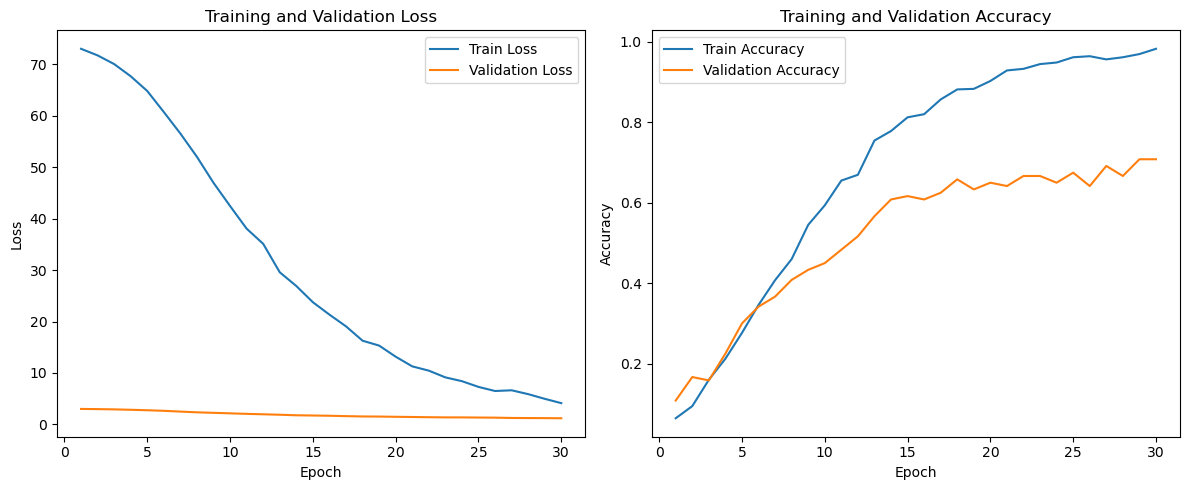

In [66]:
train_accuracies = [0.0642, 0.0944, 0.1599, 0.2123, 0.2765, 0.3460, 0.4076, 0.4600, 0.5452,
                    0.5937, 0.6553, 0.6697, 0.7549, 0.7785, 0.8126, 0.8204, 0.8571, 0.8820,
                    0.8834, 0.9030, 0.9292, 0.9332, 0.9450, 0.9489, 0.9620, 0.9646, 0.9567,
                    0.9620, 0.9699, 0.9830]

val_accuracies = [0.1083, 0.1667, 0.1583, 0.2250, 0.3000, 0.3417, 0.3667, 0.4083, 0.4333,
                  0.4500, 0.4833, 0.5167, 0.5667, 0.6083, 0.6167, 0.6083, 0.6250, 0.6583,
                  0.6333, 0.6500, 0.6417, 0.6667, 0.6667, 0.6500, 0.6750, 0.6417, 0.6917,
                  0.6667, 0.7083, 0.7083]

train_losses = [73.02, 71.74, 70.05, 67.68, 64.81, 60.72, 56.54, 52.01, 46.96, 42.45, 38.05,
                35.10, 29.57, 26.90, 23.75, 21.34, 19.06, 16.27, 15.32, 13.16, 11.28, 10.45,
                9.14, 8.40, 7.29, 6.49, 6.63, 5.88, 4.97, 4.13]

val_losses = [3.0039, 2.9709, 2.9192, 2.8401, 2.7502, 2.6376, 2.4896, 2.3447, 2.2499, 2.1499,
              2.0446, 1.9648, 1.8741, 1.7711, 1.7257, 1.6799, 1.6034, 1.5425, 1.5213, 1.4773,
              1.4364, 1.3958, 1.3633, 1.3586, 1.3318, 1.3108, 1.2489, 1.2333, 1.2200, 1.1938]

import matplotlib.pyplot as plt

epochs = range(1, len(train_accuracies) + 1)

plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### Training Summary

The InceptionV3 model was successfully fine-tuned on the complete 21-class sneaker dataset. Training and validation metrics show steady improvement across epochs, demonstrating effective learning and generalization.

- **Final Training Accuracy**: 98.30%
- **Final Validation Accuracy**: 70.83%
- **Best Model Saved To**: `inceptionv3_sneakers_21class.pth`

The training and validation curves are shown below to visualize performance trends over time.

This fine-tuned model will now be used for downstream evaluation on robot-captured images of the selected sneaker classes, testing real-world generalization.


### Evaluation on Robot-Captured Test Images (3 Classes)

We evaluated the 21-class InceptionV3 model on robot-captured test images from the following classes:

- Nike_Infinity_React_3
- Nike_Vomero_17
- Nike_Winflo_10

Since the model wasn't fine-tuned on robot images, this test reflects its out-of-domain generalization.


Detected test classes: ['Nike_Infinity_React_3', 'Nike_Vomero_17', 'Nike_Winflo_10']
Total test images loaded: 34

Total predictions made: 34

Classification Report – Robot Test Set vs Full Model Classes:
                       precision    recall  f1-score   support

Nike_Infinity_React_3     0.5000    0.1818    0.2667        11
       Nike_Vomero_17     0.0000    0.0000    0.0000        11
       Nike_Winflo_10     0.0000    0.0000    0.0000        12

            micro avg     0.5000    0.0588    0.1053        34
            macro avg     0.1667    0.0606    0.0889        34
         weighted avg     0.1618    0.0588    0.0863        34



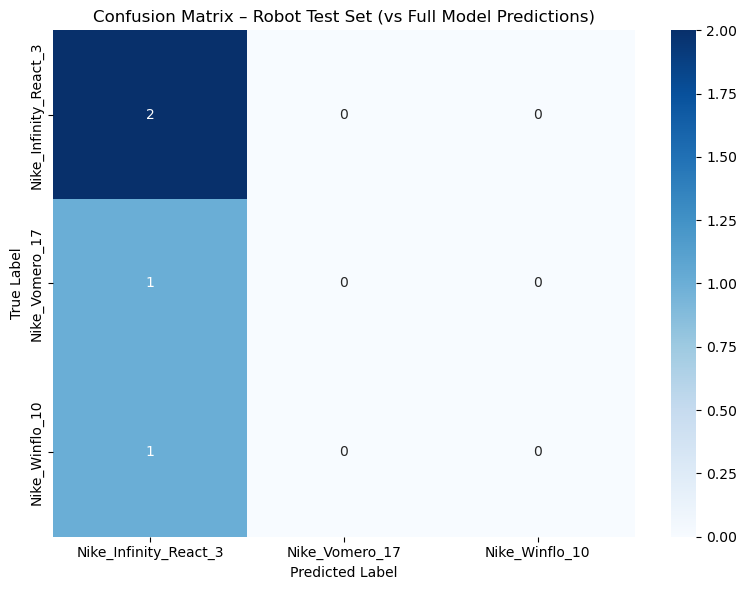


Accuracy on Robot Test Set (Full 21-Class Model): 0.0588


In [54]:
import os
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# === Step 1: Config ===
robot_test_dir = "/Users/shaimonrahman/Desktop/COMP8430/Group Project/Phase_3/robot_dataset/test_set"
model_path = "inceptionv3_sneakers_21class.pth"
img_size = (299, 299)
batch_size = 32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Step 2: Transform ===
test_transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# === Step 3: Load Robot Test Set (3 classes only) ===
test_dataset = datasets.ImageFolder(robot_test_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

test_class_map = test_dataset.class_to_idx
robot_class_names = list(test_class_map.keys())
print(f"Detected test classes: {robot_class_names}")
print(f"Total test images loaded: {len(test_dataset)}")

# === Step 4: Load Trained 21-Class InceptionV3 Model ===
model = models.inception_v3(aux_logits=True)
model.fc = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(model.fc.in_features, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, 21)
)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# === Step 5: Define Full Class Labels ===
full_class_labels = [
    'Adidas_Adios_Pro_4', 'Adidas_Supernova_Rise_2', 'Adidas_Ultraboost_5',
    'Asics_GT_2000_11', 'Asics_Gel_Kayano_31', 'Asics_Gel_Nimbus_26',
    'Hoka_Bondi_8', 'Hoka_Clifton_9', 'Hoka_Rincon_4',
    'Nike_Air_Max_270', 'Nike_Air_Max_90', 'Nike_Air_Zoom_Pegasus_38',
    'Nike_Alphafly_3', 'Nike_Dunk_Low_Retro', 'Nike_Free_Metcon_6',
    'Nike_Infinity_RN_4', 'Nike_Infinity_React_3', 'Nike_Invincible_RN_3',
    'Nike_Vaporfly_4', 'Nike_Vomero_17', 'Nike_Winflo_10'
]

# === Step 6: Prediction Loop ===
all_preds = []
all_targets = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        if isinstance(outputs, tuple):
            outputs = outputs[0]  # remove aux_logits output
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(labels.numpy())

print(f"\nTotal predictions made: {len(all_preds)}")

# === Step 7: Map robot labels to 21-class indices ===
true_labels_21 = [full_class_labels.index(robot_class_names[i]) for i in all_targets]

# === Step 8: Evaluation (No filtering of incorrect classes) ===
print("\nClassification Report – Robot Test Set vs Full Model Classes:")
print(classification_report(
    y_true=true_labels_21,
    y_pred=all_preds,
    labels=[full_class_labels.index(cls) for cls in robot_class_names],
    target_names=robot_class_names,
    digits=4
))

# === Step 9: Confusion Matrix ===
cm = confusion_matrix(true_labels_21, all_preds, labels=[full_class_labels.index(cls) for cls in robot_class_names])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=robot_class_names,
            yticklabels=robot_class_names)
plt.title("Confusion Matrix – Robot Test Set (vs Full Model Predictions)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# === Step 10: Accuracy (based on full model prediction space) ===
accuracy = accuracy_score(true_labels_21, all_preds)
print(f"\nAccuracy on Robot Test Set (Full 21-Class Model): {accuracy:.4f}")


### Results Summary (Before Fine-Tuning)

- **Accuracy**: 5.88%
- **Correct Predictions**: 2 out of 34
- **Most predictions were incorrect or outside the 3 target classes.**

As expected, performance is low due to domain shift. The next step is to fine-tune using robot images to improve accuracy.


### Fine-Tuning on Robot-Captured Images (3 Classes)

We fine-tuned the InceptionV3 model on robot-captured images for the following classes:

- Nike_Infinity_React_3
- Nike_Vomero_17
- Nike_Winflo_10

Starting from the 21-class model:
- The classifier was reinitialized for 3 classes.
- Based on prior testing, we unfroze only the final block (`Mixed_7c`) and the classifier, which gave the best performance.
- Data augmentation was applied for better generalization.

The model was trained using cross-entropy loss, Adam optimizer, and early stopping based on validation loss.


In [58]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import copy

# Step 1: Config
data_dir = "/Users/shaimonrahman/Desktop/COMP8430/Group Project/Phase_3/robot_dataset/fine_tuning"
model_path = "inceptionv3_sneakers_21class.pth"
save_path = "Phase_3/inceptionv3_robot_final_pytorch_3_unfrozen.pth"

img_size = (299, 299)  # InceptionV3 default
batch_size = 16
epochs = 30
learning_rate = 3e-5  # Increased for unfreezing
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 2: Transforms
train_transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Step 3: Dataset and DataLoader
train_dataset = datasets.ImageFolder(data_dir, transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

num_classes = len(train_dataset.classes)
print(f"Detected classes in fine-tuning set: {train_dataset.classes}")

# Step 4: Load Pretrained InceptionV3 Model
model = models.inception_v3(aux_logits=True)
model.fc = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(model.fc.in_features, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, 21)
)
model.load_state_dict(torch.load(model_path, map_location=device))

# Step 5: Replace Classifier for 3-Class Task
model.fc = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(2048, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, num_classes)
)

# Step 6: Freeze All Except Final Block and Classifier
for name, param in model.named_parameters():
    param.requires_grad = False
    if "fc" in name or "Mixed_7c" in name:
        param.requires_grad = True

model = model.to(device)

# Step 7: Loss Function, Optimizer, Scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

# Step 8: Training Loop
best_loss = float('inf')
best_model_wts = copy.deepcopy(model.state_dict())
patience = 5
no_improve = 0

print("Starting fine-tuning on 3-class robot dataset with Mixed_7c unfrozen...\n")
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        if isinstance(outputs, tuple):
            outputs = outputs[0]

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    acc = correct / total
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, Accuracy = {acc:.2%}")
    scheduler.step(avg_loss)

    if avg_loss < best_loss:
        best_loss = avg_loss
        best_model_wts = copy.deepcopy(model.state_dict())
        no_improve = 0
    else:
        no_improve += 1
        print(f"No improvement in loss for {no_improve} epoch(s)")
        if no_improve >= patience:
            print("Early stopping triggered.")
            break

# Step 9: Save Best Model
model.load_state_dict(best_model_wts)
torch.save(model.state_dict(), save_path)
print(f"Fine-tuned model saved to: {save_path}")


Detected classes in fine-tuning set: ['Nike_Infinity_React_3', 'Nike_Vomero_17', 'Nike_Winflo_10']
Starting fine-tuning on 3-class robot dataset with Mixed_7c unfrozen...



Epoch 1/30: 100%|█████████████████████████████████| 5/5 [00:16<00:00,  3.34s/it]


Epoch 1: Loss = 1.1136, Accuracy = 29.17%


Epoch 2/30: 100%|█████████████████████████████████| 5/5 [00:14<00:00,  2.83s/it]


Epoch 2: Loss = 1.0956, Accuracy = 31.94%


Epoch 3/30: 100%|█████████████████████████████████| 5/5 [00:14<00:00,  2.84s/it]


Epoch 3: Loss = 1.0855, Accuracy = 37.50%


Epoch 4/30: 100%|█████████████████████████████████| 5/5 [00:14<00:00,  2.81s/it]


Epoch 4: Loss = 1.0558, Accuracy = 54.17%


Epoch 5/30: 100%|█████████████████████████████████| 5/5 [00:14<00:00,  2.89s/it]


Epoch 5: Loss = 1.0288, Accuracy = 47.22%


Epoch 6/30: 100%|█████████████████████████████████| 5/5 [00:14<00:00,  2.88s/it]


Epoch 6: Loss = 1.0208, Accuracy = 55.56%


Epoch 7/30: 100%|█████████████████████████████████| 5/5 [00:14<00:00,  2.94s/it]


Epoch 7: Loss = 0.9957, Accuracy = 61.11%


Epoch 8/30: 100%|█████████████████████████████████| 5/5 [00:14<00:00,  2.98s/it]


Epoch 8: Loss = 0.9860, Accuracy = 65.28%


Epoch 9/30: 100%|█████████████████████████████████| 5/5 [00:15<00:00,  3.03s/it]


Epoch 9: Loss = 0.9864, Accuracy = 63.89%
No improvement in loss for 1 epoch(s)


Epoch 10/30: 100%|████████████████████████████████| 5/5 [00:15<00:00,  3.05s/it]


Epoch 10: Loss = 0.9295, Accuracy = 73.61%


Epoch 11/30: 100%|████████████████████████████████| 5/5 [00:15<00:00,  3.10s/it]


Epoch 11: Loss = 0.9228, Accuracy = 72.22%


Epoch 12/30: 100%|████████████████████████████████| 5/5 [00:15<00:00,  3.13s/it]


Epoch 12: Loss = 0.8828, Accuracy = 73.61%


Epoch 13/30: 100%|████████████████████████████████| 5/5 [00:15<00:00,  3.15s/it]


Epoch 13: Loss = 0.8967, Accuracy = 76.39%
No improvement in loss for 1 epoch(s)


Epoch 14/30: 100%|████████████████████████████████| 5/5 [00:15<00:00,  3.17s/it]


Epoch 14: Loss = 0.8504, Accuracy = 75.00%


Epoch 15/30: 100%|████████████████████████████████| 5/5 [00:15<00:00,  3.17s/it]


Epoch 15: Loss = 0.8596, Accuracy = 83.33%
No improvement in loss for 1 epoch(s)


Epoch 16/30: 100%|████████████████████████████████| 5/5 [00:15<00:00,  3.13s/it]


Epoch 16: Loss = 0.7999, Accuracy = 80.56%


Epoch 17/30: 100%|████████████████████████████████| 5/5 [00:15<00:00,  3.11s/it]


Epoch 17: Loss = 0.7768, Accuracy = 84.72%


Epoch 18/30: 100%|████████████████████████████████| 5/5 [00:15<00:00,  3.16s/it]


Epoch 18: Loss = 0.7628, Accuracy = 76.39%


Epoch 19/30: 100%|████████████████████████████████| 5/5 [00:15<00:00,  3.18s/it]


Epoch 19: Loss = 0.7316, Accuracy = 86.11%


Epoch 20/30: 100%|████████████████████████████████| 5/5 [00:18<00:00,  3.80s/it]


Epoch 20: Loss = 0.6932, Accuracy = 81.94%


Epoch 21/30: 100%|████████████████████████████████| 5/5 [00:18<00:00,  3.71s/it]


Epoch 21: Loss = 0.6437, Accuracy = 88.89%


Epoch 22/30: 100%|████████████████████████████████| 5/5 [00:15<00:00,  3.19s/it]


Epoch 22: Loss = 0.6527, Accuracy = 84.72%
No improvement in loss for 1 epoch(s)


Epoch 23/30: 100%|████████████████████████████████| 5/5 [00:15<00:00,  3.18s/it]


Epoch 23: Loss = 0.6049, Accuracy = 94.44%


Epoch 24/30: 100%|████████████████████████████████| 5/5 [00:15<00:00,  3.18s/it]


Epoch 24: Loss = 0.5718, Accuracy = 91.67%


Epoch 25/30: 100%|████████████████████████████████| 5/5 [00:15<00:00,  3.18s/it]


Epoch 25: Loss = 0.5694, Accuracy = 86.11%


Epoch 26/30: 100%|████████████████████████████████| 5/5 [00:15<00:00,  3.19s/it]


Epoch 26: Loss = 0.5233, Accuracy = 93.06%


Epoch 27/30: 100%|████████████████████████████████| 5/5 [00:15<00:00,  3.19s/it]


Epoch 27: Loss = 0.4668, Accuracy = 100.00%


Epoch 28/30: 100%|████████████████████████████████| 5/5 [00:17<00:00,  3.55s/it]


Epoch 28: Loss = 0.5698, Accuracy = 90.28%
No improvement in loss for 1 epoch(s)


Epoch 29/30: 100%|████████████████████████████████| 5/5 [00:17<00:00,  3.48s/it]


Epoch 29: Loss = 0.4486, Accuracy = 95.83%


Epoch 30/30: 100%|████████████████████████████████| 5/5 [00:17<00:00,  3.44s/it]


Epoch 30: Loss = 0.4367, Accuracy = 94.44%
Fine-tuned model saved to: Phase_3/inceptionv3_robot_final_pytorch_3_unfrozen.pth


### Fine-Tuning Summary – Robot 3-Class Dataset

- Training completed across all 30 epochs (no early stopping).
- Final training accuracy: **94.44%**
- Loss consistently decreased, showing effective adaptation.

The final model (`inceptionv3_robot_final_pytorch_3_unfrozen.pth`) will now be evaluated on the robot test set to assess real-world performance.


### Evaluation on Robot Test Set (Post Fine-Tuning)

The fine-tuned 3-class model is evaluated on unseen robot-captured images from:

- Nike_Infinity_React_3
- Nike_Vomero_17
- Nike_Winflo_10

We report accuracy, precision, recall, F1-score, and visualize misclassifications.


Detected test classes: ['Nike_Infinity_React_3', 'Nike_Vomero_17', 'Nike_Winflo_10']
Total test images: 34

Classification Report:
                       precision    recall  f1-score   support

Nike_Infinity_React_3     1.0000    0.4545    0.6250        11
       Nike_Vomero_17     0.7333    1.0000    0.8462        11
       Nike_Winflo_10     0.8571    1.0000    0.9231        12

             accuracy                         0.8235        34
            macro avg     0.8635    0.8182    0.7981        34
         weighted avg     0.8633    0.8235    0.8018        34



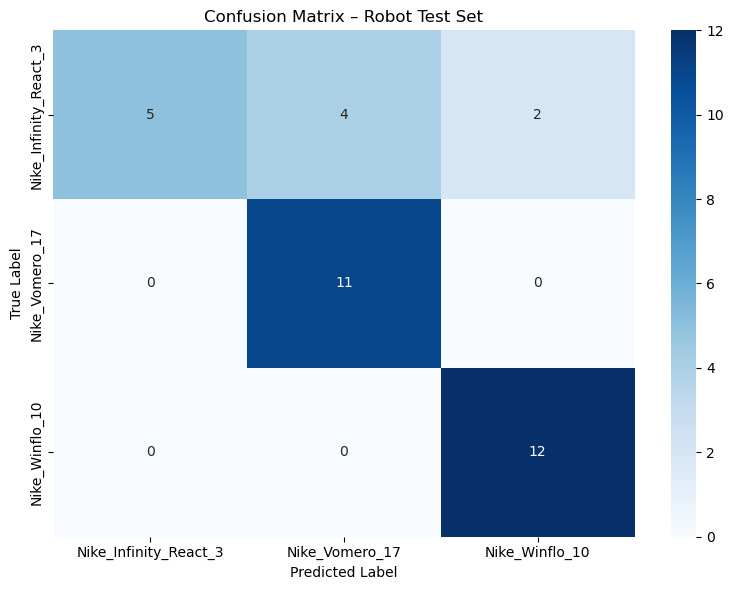


Overall Test Accuracy: 0.8235

Total Misclassified Images: 6


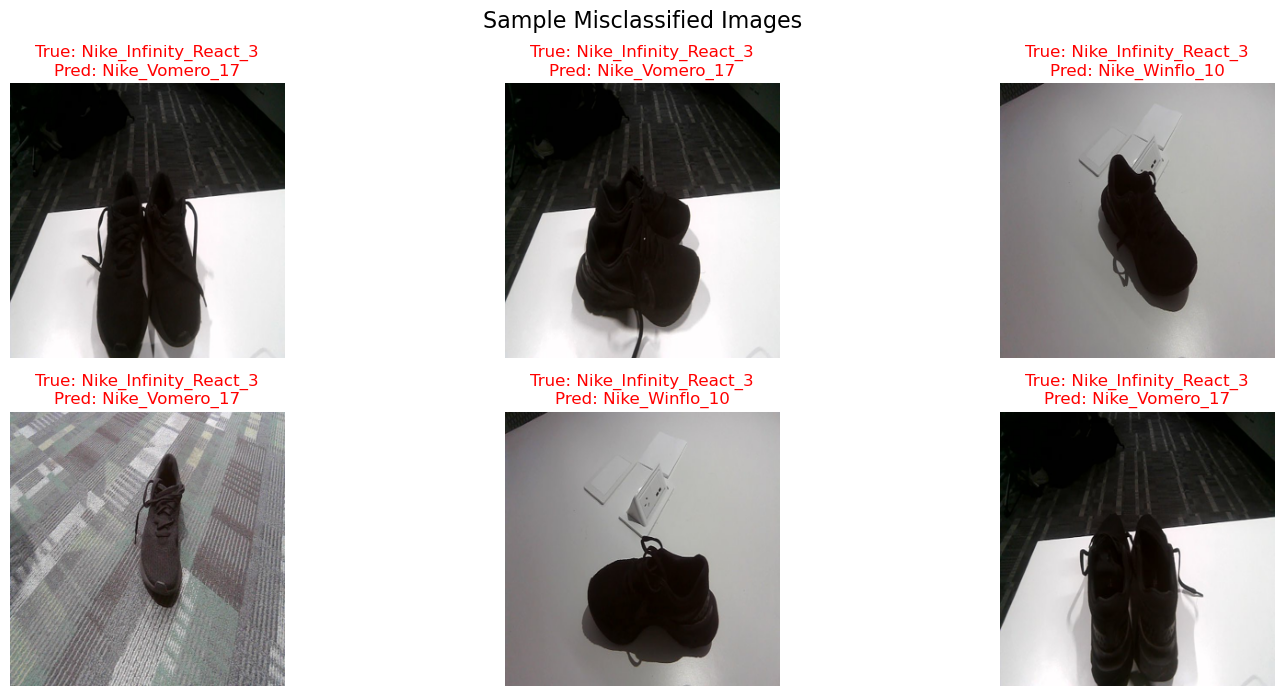

In [62]:
import os
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# === Config ===
robot_test_dir = "/Users/shaimonrahman/Desktop/COMP8430/Group Project/Phase_3/robot_dataset/test_set"
model_path = "Phase_3/inceptionv3_robot_final_pytorch_3_unfrozen.pth"
img_size = (299, 299)
batch_size = 16
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Transforms ===
test_transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# === Dataset & DataLoader ===
test_dataset = datasets.ImageFolder(robot_test_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
class_labels = test_dataset.classes
print(f"Detected test classes: {class_labels}")
print(f"Total test images: {len(test_dataset)}")

# === Load Fine-Tuned Model ===
model = models.inception_v3(aux_logits=True)
model.fc = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(2048, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, len(class_labels))
)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

# === Inference & Tracking ===
all_preds = []
all_labels = []
misclassified = []

image_paths = [s[0] for s in test_dataset.samples]

with torch.no_grad():
    for batch_idx, (inputs, labels) in enumerate(test_loader):
        inputs = inputs.to(device)
        outputs = model(inputs)
        if isinstance(outputs, tuple):  # remove aux_logits if present
            outputs = outputs[0]
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

        for i in range(inputs.size(0)):
            true = labels[i].item()
            pred = preds[i].item()
            if true != pred:
                misclassified.append((image_paths[batch_idx * batch_size + i], true, pred))

# === Metrics ===
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_labels, digits=4))

# === Confusion Matrix ===
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix – Robot Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()

# === Accuracy ===
acc = accuracy_score(all_labels, all_preds)
print(f"\nOverall Test Accuracy: {acc:.4f}")

# === Misclassified Samples Visualization ===
print(f"\nTotal Misclassified Images: {len(misclassified)}")
num_to_show = min(len(misclassified), 9)
if num_to_show > 0:
    plt.figure(figsize=(15, 10))
    for i in range(num_to_show):
        path, true_idx, pred_idx = misclassified[i]
        img = Image.open(path).convert("RGB").resize(img_size)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(f"True: {class_labels[true_idx]}\nPred: {class_labels[pred_idx]}", color='red')
        plt.axis('off')
    plt.tight_layout()
    plt.suptitle("Sample Misclassified Images", fontsize=16, y=1.02)
    plt.savefig("misclassified_examples.png", dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No misclassified images to visualize.")


### Evaluation Results on Robot-Captured Test Set (After Fine-Tuning)

The fine-tuned model was evaluated on the robot-captured test set containing 3 sneaker classes. The model demonstrates strong performance:

- **Overall Accuracy**: 82.35%
- **Macro F1-score**: 0.7981
- **Misclassifications**: 6 out of 34 images

#### Key Insights:

- Perfect classification was achieved for both **Nike_Vomero_17** and **Nike_Winflo_10**.
- Most misclassifications occurred within the **Nike_Infinity_React_3** class, often confused with the other two.
- Visualizations such as the confusion matrix and misclassified image samples provide further interpretability of the model’s decisions.

This confirms that robot-specific fine-tuning significantly improves real-world recognition performance.


### Real-Time Deployment on ROS2: Sneaker-Based Robot Control

We deployed our fine-tuned 3-class InceptionV3 model on a ROS2 robot for real-time sneaker recognition and movement. The robot uses the `/depth_cam/rgb/image_raw` feed to classify objects and trigger motion commands.

**Class-to-Action Mapping:**
- Nike_Infinity_React_3 → Move Forward  
- Nike_Vomero_17 → Turn Left  
- Nike_Winflo_10 → Turn Right  

**Fallbacks:**
- Low confidence → Stay Still  
- Spacebar → Emergency Stop  

The deployment script (`ros2_deploy_inceptionv3_sneaker_detection_3class.py`) extends the Week 9 ROS2 control code (`move.py`, `stop.py`) by mapping predicted classes to `Twist` messages on `/cmd_vel`. This forms a closed-loop system linking vision and motion.


### Demo Video

Watch the robot detecting sneakers and performing actions in real time:

[Watch the demo video](https://drive.google.com/file/d/1rZJ9gnLhL2xBUB93kVEu9yAhHrP8OQ_g/view?usp=sharing)


### Conclusion

We developed a fine-grained sneaker classification system and deployed it on a ROS2 robot. After fine-tuning with robot-captured images, the model achieved strong performance and enabled real-time control based on visual input.

This project shows how visual recognition can drive robot behavior in practical settings.

### Future Improvements

- Collect more diverse training data
- Add more sneaker classes
- Improve model speed and reliability for real-time use
